In [1]:
from numpy import *
from math import factorial as fact
import numpy as np
import copy

Базис

In [2]:
import fermi_basis as fb

Оператор повышения * понижения

In [3]:
def up_down(number_to_up, number_to_down, function):
    if function[number_to_down] == 0:
        return [0,function]
    elif function[number_to_up] == 1:
        return [0,function]
    else:
        coef_down = sqrt(function[number_to_down])
        function[number_to_down] = function[number_to_down] - 1
        coef_up = sqrt(function[number_to_up] + 1)
        function[number_to_up] = function[number_to_up] + 1
        return [round(coef_down*coef_up,5), function]
        

Поиск индекса функции

In [4]:
def indx(start_function, searched_function):
    for i in range(len(start_function)):
        g = 0
        for j in range(start_function.size/len(start_function)):
            if start_function[i,j] == (searched_function[j]):
                g += 1
                if g == start_function.shape[1]:
                    x = i
                    break                
    return x

Знак

In [5]:
def sign(k,l,func):
    if k > 7:
        (k,l) = (k-8,l-8)
    if sum(func[k+1:l])%2:
        return 1
    else:
        return -1

Заполнение матрицы Гамильтона

In [6]:
import progressbar

In [55]:
U = 4; V = np.array([1,2,1,2,1,2]); m = 4; n_up = 2; n_down = 2; ee = np.array([-1,0,1])
fi = fb.basis_spin(m,n_up,n_down)
H = zeros((len(fi),len(fi)))
bar = progressbar.ProgressBar()
for i in bar(range(len(fi))):
    for j in range(1,m,1):
        # Перескоки с ванны на узел и обратно
        H[i,indx(fi,up_down(0,j,copy.copy(fi)[i])[1])] += V[j-1]*sign(0,j,fi[i])*up_down(0,j,copy.copy(fi)[i])[0]
        H[i,indx(fi,up_down(m,j+m,copy.copy(fi)[i])[1])] += V[j+m-2]*sign(m,j+m,fi[i])*up_down(m,j+m,copy.copy(fi)[i])[0]
        H[i,indx(fi,up_down(j,0,copy.copy(fi)[i])[1])] += V[j-1]*sign(0,j,fi[i])*up_down(j,0,copy.copy(fi)[i])[0]
        H[i,indx(fi,up_down(j+m,m,copy.copy(fi)[i])[1])] += V[j+m-2]*sign(m,j+m,fi[i])*up_down(j+m,m,copy.copy(fi)[i])[0]
        H[i,i] += ee[j-1] * (fi[i][j] + fi[i][j+m])
        
    # One-site interactive
    H[i,i] += U * fi[i][0]*fi[i][m]

100% |########################################################################|


In [59]:
from scipy.sparse import linalg as L
E1,V1 = L.eigs(H, k = 2, which = 'SR' )

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

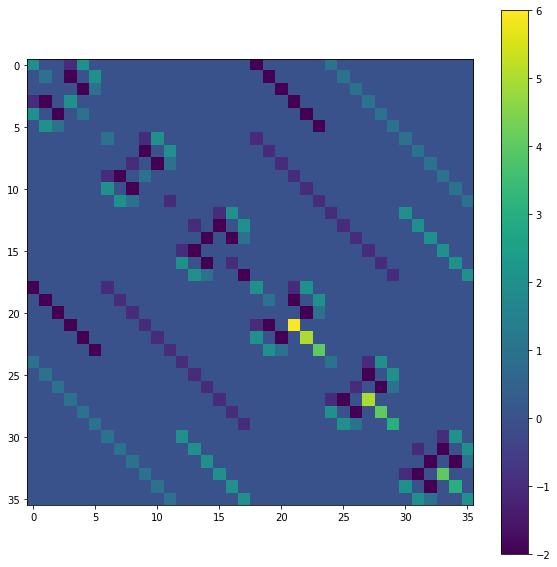

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(H)
plt.colorbar()

In [47]:
for i in range(len(fi)):
    print(H[i,i])

40.0
40.0
40.0
30.0
30.0
30.0
40.0
40.0
40.0
30.0
30.0
30.0
40.0
40.0
40.0
30.0
30.0
30.0
30.0
30.0
30.0
20.0
20.0
20.0
30.0
30.0
30.0
20.0
20.0
20.0
30.0
30.0
30.0
20.0
20.0
20.0


In [1]:
test=3

In [2]:
test

1

In [ ]:
ss